# Exemplos de regressão Logística e Redes Neurais

In [ ]:
!nvidia-smi

Mon Apr 19 17:12:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##1. Regressão Logística Simples

10
 w1:9.854917413963788 w2:-4.30370947919686 b:8.916673228743832 
 e0:6.352653776131928e-05 e1:1.7254824260013878e-12 e2:1.0714057404158428e-10 e3:2.765701227823133e-10 
 2.7 e 10.5 = 8.521507949514589e-09 
 1.5 e 11.8 = 2.3162876525943895e-16 
 5.5 e 20.0 = 1.439142564294736e-14 
 3.5 e 15.2 = 3.713660942382606e-14 
 3.1 e 14.5 = 1.4661616110503427e-14 
 7.6 e 15.5 = 0.9997226285092784 
 1.5 e 3.5 = 0.43030495442266076 
 6.9 e 8.5 = 0.9999999999999774 
 8.6 e 2.0 = 1.0 
 7.66 e 3.5 = 1.0 


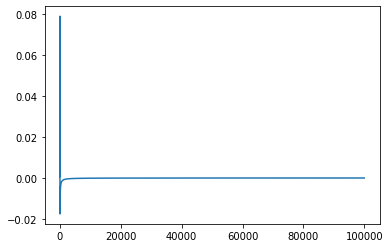

In [ ]:
# Autor: Alcione de Paiva Oliveira

from math import exp
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + exp(-x))

# Entrada X[0] Salario, x[1] Emprestimo
X = [[2.7,10.5],[1.5,11.8],[5.5,20.0],[3.5,15.2],[3.1,14.5],[7.6,15.5],[1.5,3.5],[6.9,8.5],[8.6,2.0],[7.66,3.5]]
Y = [0   , 0   , 0   , 0   , 0   , 1   , 1  , 1  ,   1, 1]
erros=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

alpha = 0.1

m = len(X)

print(m)

w=[0.5,0.5]
b=1

epocas = 100000
erromedio = [0.0]*epocas

for n in range(epocas):
  for j in range(m):
    z = X[j][0]*w[0]+X[j][1]*w[1]+b
    A = sigmoid(z)
         
    # Calcula erro
    erros[j] = A-Y[j]

    b = b - alpha * erros[j]  
    w[0] = w[0] - alpha * erros[j]  *X[j][0] 
    w[1] = w[1] - alpha * erros[j]  *X[j][1]

  erromedio[n] =sum(erros)/len(erros)

print(" w1:{} w2:{} b:{} ".format( w[0],  w[1], b))
print(" e0:{} e1:{} e2:{} e3:{} ".format( erro[0],  erros[1], erros[2],erros[3]))
for j in range(m):
   z = X[j][0]*w[0]+X[j][1]*w[1];
   a = sigmoid(z);
   print(" {} e {} = {} ".format( X[j][0] ,  X[j][1], a))

plt.plot(erromedio, label="Erro Medio")

plt.show() 

##2. Numpy

O uso do pacote para **numpy** facilita e acelera a manipulação de arrays. Numpy é um pacote para arrays e algebra linear, implementado em C++. O código pode ficar até 300 vezes mais rápido. 

In [ ]:
import numpy as np
a = np.random.rand(1000000)
b = np.random.rand(1000000)
%timeit c = np.dot(a,b)

c = 0

%timeit [ c+a[i]*b[i] for i in range(1000000) ]


1000 loops, best of 5: 672 µs per loop
1 loop, best of 5: 795 ms per loop


## Regressão com Numpy

[1.07305488e-04 3.00920994e-17 1.76524078e-05 1.10206043e-09
 3.77957210e-11 1.00000000e+00 9.99595954e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


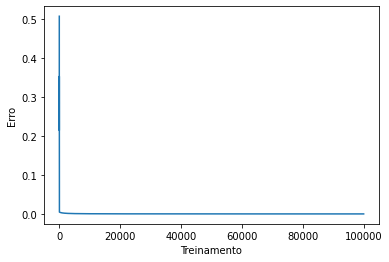

Precisão 99.99%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoide (x): return 1/(1 + np.exp(-x))      # Sigmoide - Funcao de ativacao

# Entrada X[0] Salario, x[1] Emprestimo
X = np.array([[2.7,10.5],[1.5,11.8],[5.5,20.0],[3.5,15.2],[3.1,14.5],[7.6,15.5],[1.5,3.5],[6.9,8.5],[8.6,2.0],[7.66,3.5]])
Y = np.array([0   , 0   , 0   , 0   , 0   , 1   , 1  , 1  ,   1, 1])
erros=[]

alpha = 0.1

W=np.array([0.5,0.5])
b=1

epocas = 100000

for n in range(epocas):
    A = sigmoide(np.dot(X, W)) 
    E = A -Y                                   # Calculo do erro

    error = np.mean(np.abs(E))
    erros.append(error)
    accuracy = (1 - error) * 100

    b = b - alpha * E  
    W +=  -alpha * E.T.dot(X) 

print(A)  

# Plotando a precisao 
plt.plot(erros)
plt.xlabel('Treinamento')
plt.ylabel('Erro')
plt.show()

print("Precisão " + str(round(accuracy,2)) + "%")

##**Perceptron**



[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]


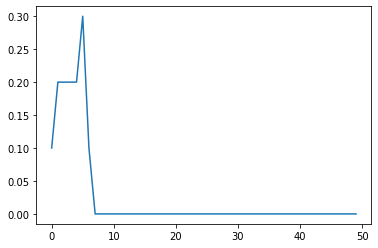

In [ ]:
# Autor: Alcione de Paiva Oliveira

import numpy as np
import matplotlib.pyplot as plt

# Entrada e saída
# Entrada X[0] Salario, x[1] Emprestimo
X = np.array([[2.7,10.5],[1.5,11.8],[5.5,20.0],[3.5,15.2],[3.1,14.5],[7.6,15.5],[1.5,3.5],[6.9,8.5],[8.6,2.0],[7.66,3.5]])
Y = np.array([0   , 0   , 0   , 0   , 0   , 1   , 1  , 1  ,   1, 1])

# taxa de aprendizado
alpha = 0.1   

# Numero de exemplos
m = np.size(X,0)

# pesos iniciais
w =  np.array([0.3,-0.1])

# Bias
b=-0.2

epocas = 50

J = [0]*epocas

for n in range(epocas):

    yhat = [0]*m
    e    = [0]*m
    for i in range(m):
        
        z = np.dot(w.T,X[i])+b
        
        # Computa saída
        yhat[i] = 1.0 if z >= 0.0 else 0.0
        
        # Calcula erro
        e[i] = Y[i]-yhat[i]

        # Ajusta os pesos
        w[0] = w[0] + alpha*e[i]*X[i][0]
        w[1] = w[1] + alpha*e[i]*X[i][1]

#   print(w)
#   print(e)
    J[n] = np.sum(np.square(e))/m   # Para fins de plotagem calcula a média do erro quadrado


print(yhat)
    
plt.plot(J, label="Erro médio Quadrado")
plt.show() 

## Rede Neural com Numpy

[[0.00727161]
 [0.00322321]
 [0.00459903]
 [0.00337502]
 [0.00329184]
 [0.99856621]
 [0.99010422]
 [0.99856639]
 [0.99856637]
 [0.99856638]]


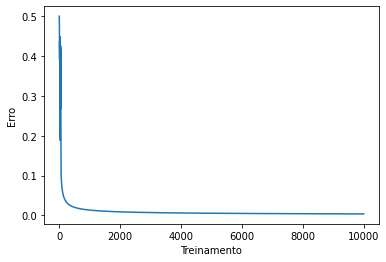

Precisão 99.63%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

 
epochs = 10000           # Numero de epocas
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1
 
# Entrada X[0] Salario, x[1] Eemprestimo
X = np.array([[2.7,10.5],[1.5,11.8],[5.5,20.0],[3.5,15.2],[3.1,14.5],[7.6,15.5],[1.5,3.5],[6.9,8.5],[8.6,2.0],[7.66,3.5]])
Y = np.array([[0]   , [0]   , [0]   , [0]   , [0]   , [1]   , [1]  , [1]  ,   [1], [1]])
 
def sigmoid (x): return 1/(1 + np.exp(-x))      # Sigmoide - Funcao de ativacao
def sigmoid_(x): return x * (1 - x)             # Derivada da Sigmoide

# Pesos 
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))

#taxa de aprendizado
alpha = 0.1

# Erros para plotagem
errors = []

for i in range(epochs):
 
    H = sigmoid(np.dot(X, Wh))                  # Resultados para camada oculta
    Z = sigmoid(np.dot(H, Wz))                  # Resultados para camada de saida
    E = Y - Z                                   # Calculo do erro (Inverteu a diferenca)
    dZ = E * sigmoid_(Z)                        # delta Z
    dH = dZ.dot(Wz.T) * sigmoid_(H)             # delta H
    Wz +=  H.T.dot(dZ)*alpha                    # Atualizacao dos pesos da camada de saida
    Wh +=  X.T.dot(dH)*alpha                    # Atualizacao dos pesos da camada oculta
    
    error = np.mean(np.abs(E))
    errors.append(error)
    accuracy = (1 - error) * 100
    
print(Z)  

# Plotando a precisao 
plt.plot(errors)
plt.xlabel('Treinamento')
plt.ylabel('Erro')
plt.show()
        
print("Precisão " + str(round(accuracy,2)) + "%")

## Rede neural com Keras

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[[0.02127619]
 [0.0061244 ]
 [0.00685854]
 [0.00682501]
 [0.00660925]
 [0.9948479 ]
 [0.9592969 ]
 [0.99697053]
 [0.9975752 ]
 [0.9975127 ]]

Test score: [0.010268309153616428, 1.0]


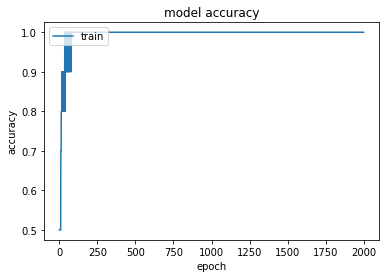

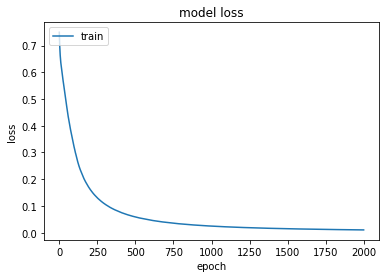

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
import numpy as np 
import matplotlib.pyplot as plt

# Entrada e saída
# Entrada X[0] Salario, x[1] Eemprestimo
X = np.array([[2.7,10.5],[1.5,11.8],[5.5,20.0],[3.5,15.2],[3.1,14.5],[7.6,15.5],[1.5,3.5],[6.9,8.5],[8.6,2.0],[7.66,3.5]])
Y = np.array([[0]   , [0]   , [0]   , [0]   , [0]   , [1]   , [1]  , [1]  ,   [1], [1]])

# Criação da rede em Keras
model = Sequential()
model.add(Dense(8,activation='sigmoid', input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Mostra a estrutura da rede
model.summary()

# Treina a rede
history = model.fit(X, Y, batch_size=1, epochs=2000, verbose=0)

# Realiza as predições 
print(model.predict_proba(X))

# Realiza uma avaliação
score = model.evaluate(X, Y, verbose=0)
print("\nTest score:", score)

# Sumariza para a precisão
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Sumariza para a mostrar a perda
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##**Adicionando momentum na rede anterior com numpy** 

[[ 1.17887305e-06 -3.44020350e-05  1.45742999e-06]
 [ 2.71016737e-06  1.02810727e-05  3.32183701e-06]]
[[0.00601417]
 [0.00398992]
 [0.00478063]
 [0.00402549]
 [0.00400188]
 [0.99637257]
 [0.99108787]
 [0.99637257]
 [0.99637116]
 [0.99637208]]


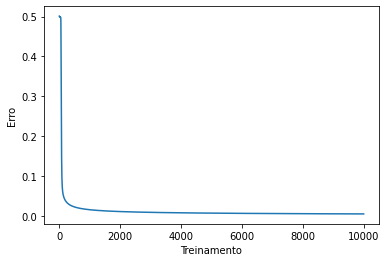

Precisão 99.54%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

 
epochs = 10000           # Numero de epocas
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1
 
X = np.array([[2.7,10.5],[1.5,11.8],[5.5,20.0],[3.5,15.2],[3.1,14.5],[7.6,15.5],[1.5,3.5],[6.9,8.5],[8.6,2.0],[7.66,3.5]])
Y = np.array([[0]   , [0]   , [0]   , [0]   , [0]   , [1]   , [1]  , [1]  ,   [1], [1]])
 
def sigmoid (x): return 1/(1 + np.exp(-x))      # Sigmoide - Funcao de ativaca
def sigmoid_(x): return x * (1 - x)             # Derivada da Sigmoide

# Pesos
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))
 
#taxa de aprendizado
alpha = 0.1

# Erros para plotagem
errors = []

# Variaveis para o momentum
gamma = 0.1
Vz = np.zeros([hiddenLayerSize,outputLayerSize])
Vh = np.zeros([inputLayerSize, hiddenLayerSize])

for i in range(epochs):
 
    H = sigmoid(np.dot(X, Wh))                  # Resultados para camada oculta
    Z = sigmoid(np.dot(H, Wz))                  # Resultados para camada de saida
    E = Y - Z                                   # Calculo do erro
    dZ = E * sigmoid_(Z)                        # delta Z
    dH = dZ.dot(Wz.T) * sigmoid_(H)             # delta H
    Vz = Vz*gamma+ H.T.dot(dZ)*alpha
    Wz +=  Vz                            # Atualizacao dos pesos da camada de saida
    Vh = Vh*gamma+ X.T.dot(dH)*alpha
    Wh +=  Vh                            # Atualizacao dos pesos da camada oculta
    
    error = np.mean(np.abs(E))
    errors.append(error)
    accuracy = (1 - error) * 100
    
print(Vh) 
print(Z)


# Plotando a precisao 
plt.plot(errors)
plt.xlabel('Treinamento')
plt.ylabel('Erro')
plt.show()
        
print("Precisão " + str(round(accuracy,2)) + "%")

##**Nesterov**

[[1.49814228e-02 9.99611570e-01 9.99999992e-01]
 [8.81878742e-08 9.99607618e-01 1.00000000e+00]
 [5.03197948e-03 9.99999746e-01 1.00000000e+00]
 [1.08086495e-04 9.99984987e-01 1.00000000e+00]
 [2.73140452e-05 9.99970825e-01 1.00000000e+00]
 [9.99999999e-01 9.99999087e-01 1.00000000e+00]
 [9.57606754e-01 9.52657643e-01 9.95930589e-01]
 [1.00000000e+00 9.99915253e-01 9.99930809e-01]
 [1.00000000e+00 9.98737122e-01 2.89908934e-03]
 [1.00000000e+00 9.99038546e-01 1.61545480e-01]]
[[ 1.00589900e-04]
 [-2.68350214e-05]
 [-2.47997448e-05]]
[[0.00566647]
 [0.00483882]
 [0.00509825]
 [0.00484049]
 [0.00483652]
 [0.9948752 ]
 [0.99284275]
 [0.99487724]
 [0.99979167]
 [0.99965292]]


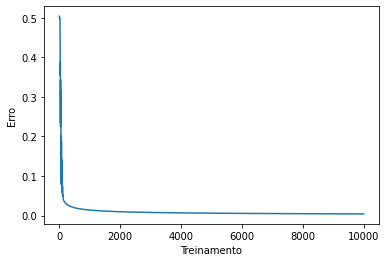

Precisão 99.57%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

 
epochs = 10000           # Numero de epocas
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1
 
X = np.array([[2.7,10.5],[1.5,11.8],[5.5,20.0],[3.5,15.2],[3.1,14.5],[7.6,15.5],[1.5,3.5],[6.9,8.5],[8.6,2.0],[7.66,3.5]])
Y = np.array([[0]   , [0]   , [0]   , [0]   , [0]   , [1]   , [1]  , [1]  ,   [1], [1]])
 
def sigmoid (x): return 1/(1 + np.exp(-x))      # Sigmoide - Funcao de ativaca
def sigmoid_(x): return x * (1 - x)             # Derivada da Sigmoide

# Pesos
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))
 
#taxa de aprendizado
alpha = 0.1

# Erros para plotagem
errors = []

# Variaveis para o momentum
gamma = 0.9
Vz = np.zeros([hiddenLayerSize,outputLayerSize])
Vh = np.zeros([inputLayerSize, hiddenLayerSize])

for i in range(epochs):
 
    H = sigmoid(np.dot(X, Wh))                  # Resultados para camada oculta
    Z = sigmoid(np.dot(H, Wz))                  # Resultados para camada de saida
    E = Y - Z                                   # Calculo do erro
    Z2 = sigmoid(np.dot(H, Wz-Vz*gamma))
    dZ = E * sigmoid_(Z2)                        # delta Z
    H2 = sigmoid(np.dot(X, Wh-Vh*gamma)) 
    dH = dZ.dot(Wz.T) * sigmoid_(H2)             # delta H
    Vz = Vz*gamma+ H.T.dot(dZ)*alpha
    Wz +=  Vz                            # Atualizacao dos pesos da camada de saida
    Vh = Vh*gamma+ X.T.dot(dH)*alpha
    Wh +=  Vh                            # Atualizacao dos pesos da camada oculta
    
    error = np.mean(np.abs(E))
    errors.append(error)
    accuracy = (1 - error) * 100
print(H)    
print(Vz) 
print(Z)


# Plotando a precisao 
plt.plot(errors)
plt.xlabel('Treinamento')
plt.ylabel('Erro')
plt.show()
        
print("Precisão " + str(round(accuracy,2)) + "%")

##**Rede Neural Básica classificação da flor Iris - características de 3 Tipos de flor Iris**
<br>

O dataset  consiste de 3 tipos diferentes da flor iris (Setosa, Versicolour, e Virginica) armazenados em um array numpy   150x4.

As características (features) fornecidas são: comprimento da Sépala, largura da Sépala ,  comprimento da pétala e largura da pétala. 

[5.8 2.8 5.1 2.4]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 93.33%
[[1.3105122e-05 9.9998617e-01 7.2698231e-07]
 [1.7977700e-10 9.1135502e-05 9.9990880e-01]
 [1.4960871e-09 6.3222781e-04 9.9936777e-01]
 [9.9999154e-01 8.4318572e-06 4.7644515e-09]
 [3.4712489e-06 9.9999344e-01 3.0440958e-06]


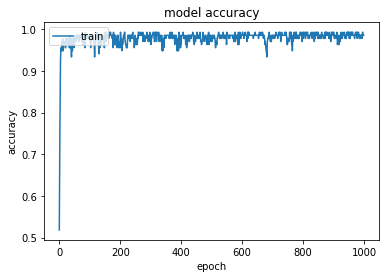

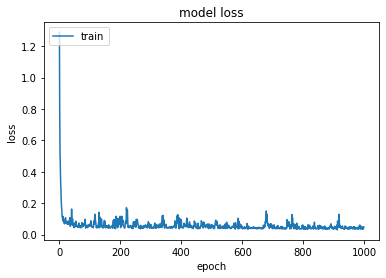


Fim


In [ ]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD,Adam
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import datasets
import matplotlib.pyplot as plt


# Fixa a reproducibilidade
seed = 7
np.random.seed(seed)

# Carrega o conjunto de dados: Iris - características de 3 Tipos de flor Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)

X = X[order]
y = y[order]

# Transforma em valores categoricos de classe
y = np_utils.to_categorical(y)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

print(X[0])
print(y[:10])


#-------------------------------
# Criando modelo
#-------------------------------
model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='relu'))
model.add(Dense(32,activation='tanh'))
#model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

# Treina o modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50, verbose=0)

# Avalie o modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


# Realiza as predições 
print(model.predict(X_test))

# Sumariza para a precisão
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Sumariza para a mostrar a perda
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("\nFim")



##Reconhecimento de Objetos com Redes Neurais Convolucionais Usando Keras

11493376/11490434 [==============================] - 0s 0us/step


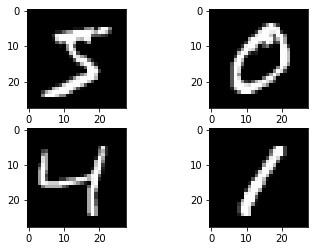

In [ ]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

==> 5
==> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Epoch 1/30
300/300 - 1s - loss: 0.2437 - accuracy: 0.9299 - val_loss: 0.0762 - val_accuracy: 0.9770
Epoch 2/30
300/300 - 1s - loss: 0.0732 - accuracy: 0.9784 - val_loss: 0.0465 - val_accuracy: 0.9844
Epoch 3/30
300/300 - 1s - loss: 0.0524 - accuracy: 0.9843 - val_loss: 0.0396 - val_accuracy: 0.9872
Epoch 4/30
300/300 - 1s - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.0368 - val_accuracy: 0.9874
Epoch 5/30
300/300 - 1s - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0360 - val_accuracy: 0.9884
Epoch 6/30
300/300 - 1s - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0320 - val_accuracy: 0.9888
Epoch 7/30
300/300 - 1s - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0338 - val_accuracy: 0.9894
Epoch 8/30
300/300 - 1s - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0335 - val_accuracy: 0.9898
Epoch 9/30
300/300 - 1s - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0383 - val_accuracy: 0.9882
Epoch 10/30
300/300 - 1s - loss: 0.0145 - accuracy: 0.9952

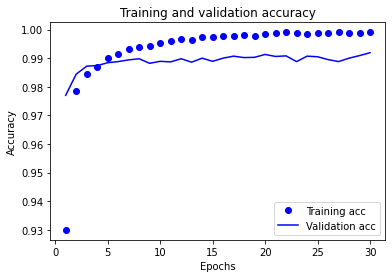

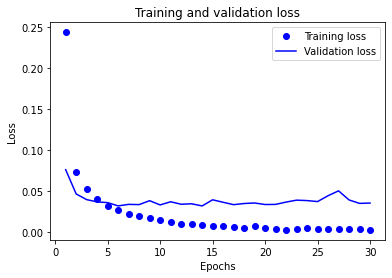

In [ ]:
import numpy
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_first')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
print("==>",y_train[0])
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print("==>",y_train[0])


# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Sumariza para a precisão
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Sumariza para a mostrar a perda
plt.clf()   # clear figure

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
